# Day 08. Exercise 04
# Regression

## 0. Imports

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [149]:
df = pd.read_csv('../data/checker_regression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    59 non-null     float64
 3   AVG(diff)    18 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [150]:
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [151]:
df.fillna(0, inplace=True)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [153]:
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

1. n_splits: количество разбиений данных для кросс-валидации.
2. X: признаки (фичи), которые мы будем использовать для обучения.
3. y: целевая переменная (то, что нужно предсказать).
4. model: модель, которую мы будем оценивать (например, LinearRegression, DecisionTreeRegressor и т.д.).

Мы используем класс KFold из библиотеки sklearn, чтобы создать стратегию для разбиения данных.
n_splits=n_splits: указывает, на сколько частей мы делим данные (например, если n_splits=10, данные разделятся на 10 частей).
shuffle=True: пе

In [154]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_rmse = [] # список, который будет хранить значения RMSE (Root Mean Squared Error) для обучающей выборки на каждом разбиении
    test_rmse = [] # будет хранить значения RMSE для тестовой выборки на каждом разбиении.

    # Цикл for проходит через разбиения данных, созданные KFold.
# train_index: индексы строк, которые будут использоваться для обучения модели.
# val_index: индексы строк, которые будут использоваться для проверки (валидации).
    for train_index, val_index in kf.split(X):
        X_train_k, X_val_k = X.iloc[train_index], X.iloc[val_index] # Обучающие данные для текущей итерации
        y_train_k, y_val_k = y.iloc[train_index], y.iloc[val_index] #Данные для проверки на текущей итерации

        model.fit(X_train_k, y_train_k)
        y_train_pred = model.predict(X_train_k) # предсказания для обучающих данных.
        y_val_pred = model.predict(X_val_k) # предсказания для проверочных данных

    # Вычисляем RMSE:
#mean_squared_error: функция для расчета средней квадратичной ошибки.
#np.sqrt: берем квадратный корень, чтобы получить RMSE.
#Добавляем результаты в соответствующие списки train_rmse и test_rmse.

        train_rmse.append(np.sqrt(mean_squared_error(y_train_k, y_train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_val_k, y_val_pred)))

# Печатаем результаты RMSE для каждой итерации:
# zip(train_rmse, test_rmse): объединяет значения RMSE для обучающей и тестовой выборок.
# enumerate: добавляет индекс каждой пары результатов.

    for i, (tr, te) in enumerate(zip(train_rmse, test_rmse)):
        print(f"train - {tr:.4f}   |   test - {te:.4f}")

    print(f"Average RMSE on crossval is {np.mean(test_rmse):.4f}")
    

In [155]:
# models = {
#     "LinearRegression": LinearRegression(),
#     "DecisionTreeRegressor": DecisionTreeRegressor(random_state=21, max_depth=5),
#     "RandomForestRegressor": RandomForestRegressor(random_state=21, n_estimators=100, max_depth=5)
# }

# for name, model in models.items():
#     print(f"\n{name}:")
#     crossval(10, X_train, y_train, model)

In [156]:
linear_reg = LinearRegression()
print("LinearRegression")
crossval(10, X_train, y_train, linear_reg)

LinearRegression
train - 43.8519   |   test - 42.0153
train - 41.8010   |   test - 58.1907
train - 44.6955   |   test - 34.8927
train - 38.8455   |   test - 76.6015
train - 44.8608   |   test - 31.9043
train - 44.8550   |   test - 30.3690
train - 42.0718   |   test - 56.1033
train - 45.6755   |   test - 16.5440
train - 43.6067   |   test - 45.8555
train - 44.2670   |   test - 39.0689
Average RMSE on crossval is 43.1545


In [157]:
tree = DecisionTreeRegressor(random_state=21, max_depth=5)
print("DecisionTreeRegressor")
crossval(10, X_train, y_train, tree)

DecisionTreeRegressor
train - 15.9515   |   test - 36.9901
train - 12.0512   |   test - 38.5897
train - 12.9216   |   test - 33.4764
train - 0.0000   |   test - 60.3647
train - 12.9586   |   test - 21.2833
train - 14.1728   |   test - 23.4335
train - 16.6581   |   test - 36.6084
train - 9.6103   |   test - 71.5733
train - 9.3042   |   test - 60.0909
train - 13.6766   |   test - 46.3362
Average RMSE on crossval is 42.8746


In [158]:
forest = RandomForestRegressor(random_state=21, n_estimators=100, max_depth=25)
print("RandomForestRegressor")
crossval(10, X_train, y_train, forest)

RandomForestRegressor


train - 14.3890   |   test - 22.9049
train - 14.0837   |   test - 40.2636
train - 14.0367   |   test - 38.2620
train - 12.0246   |   test - 58.1786
train - 14.7198   |   test - 23.7358
train - 15.5041   |   test - 9.5657
train - 14.8054   |   test - 27.3329
train - 12.8549   |   test - 57.0205
train - 13.4957   |   test - 39.0729
train - 14.1719   |   test - 33.9311
Average RMSE on crossval is 35.0268


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [159]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=21, max_depth=5),
    "RandomForestRegressor": RandomForestRegressor(random_state=21, n_estimators=100, max_depth=25)}

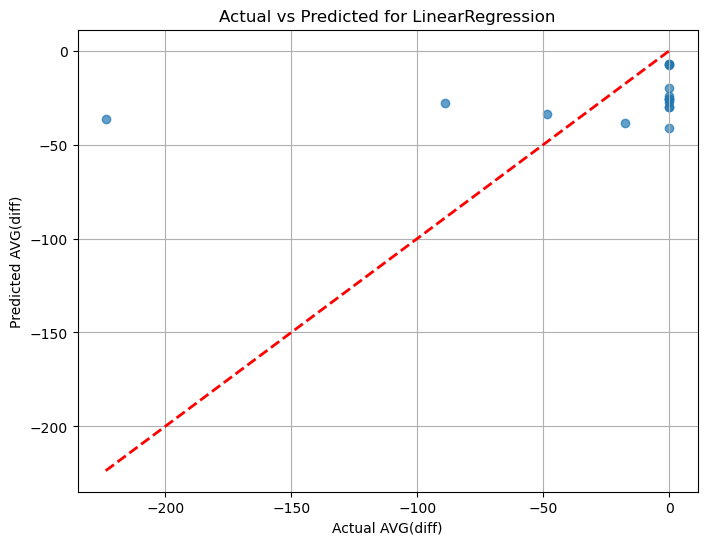

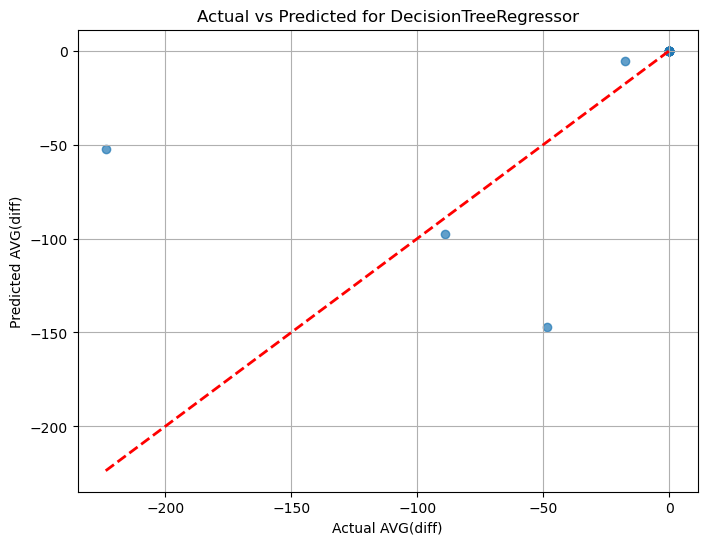

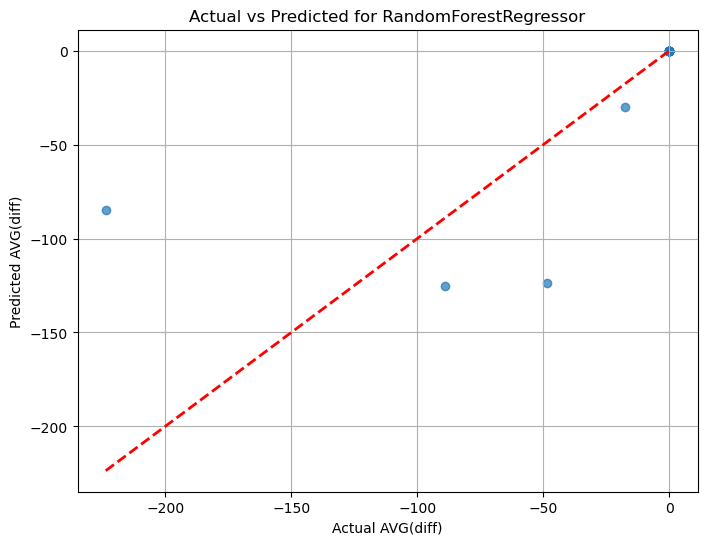

In [163]:
final_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    final_results[name] = y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.title(f"Actual vs Predicted for {name}")
    plt.xlabel("Actual AVG(diff)")
    plt.ylabel("Predicted AVG(diff)")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.grid()
    plt.show()

В идеальном случае на графике все точки должны лежать на красной пунктирной диагональной линии,
что указывает на то, что прогнозируемые значения в точности соответствуют фактическим значениям.